  # Premiers pas avec Jupyter Notebook # 


## I - Fonctions de bases

* Python est un language interprété, très utilisé 
* 2 modes: interactif (jupyter notebook), script

Exemple simple d'utilisation de jupyter notebook:

In [3]:
café = "chaud"
Café = "froid"
Cafe = "frappé"
print(café, Café, Cafe)

chaud froid frappé


* Différents types de variables 

In [14]:
a = 2                  # <class "int">, nbr entier
print(type(a)) 

<class 'int'>


In [15]:
a = 2.5               # <class "float">, nbr flottant
print(type(a))

<class 'float'>


In [18]:
a = True              #<class "bool", booléen, variable a 2 états
print(type(a))

<class 'bool'>


In [19]:
a = "café"          #<class "str",chaine
print(type(a))

<class 'str'>


* Operations de base 

In [27]:
X = 3
Y = 4
print("X =",X, "Y =",Y)

#Addition
print("addition, X+Y=",X+Y)

#Multiplication
print("multiplication, X*Y=",X*Y)

#Division
print("division, X/Y=",X/Y)

#Puissance
print("puissance, X^Y=", X**Y)

X = 3 Y = 4
addition, X+Y= 7
multiplication, X*Y= 12
division, X/Y= 0.75
puissance, X^Y= 81


* Comparaisons

In [ ]:
X = 3
Y = 4

#Egal
print("Egal", X==Y)  #false

#Different
print("different", X!=Y) #true

#Superieur ou egale
print("superieur ou egale", X>=Y) #false

* Affectations

In [ ]:
X = 3
Y = 4

X += Y   #X=X+Y
print("X=",X)

X *= Y
print("X*Y",X) #X=X*Y

* Entrées/Sorties

In [ ]:
print("bonjour")
a = 2; b = 3
print("mangez", a, "pommes et ",b, "poires") 

## II - Fonctions avancées (direct bam bam !) ##

### II.I BRIAN (simulator for spiking neural networks) ###

conda install -c conda-forge brian2 (installation de brian2 avec Anaconda)

* Exemple 1: neurone unique

Text(0, 0.5, 'voltage (V)')

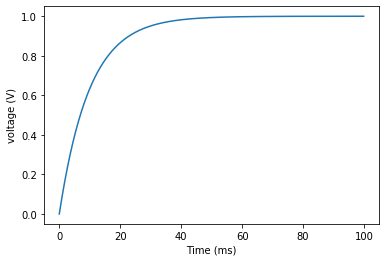

In [23]:
start_scope ()

from brian2 import *
%matplotlib inline 

tau = 10*ms #tau = 1/f
eqs = ''' 
dv/dt = (1-v)/tau : 1 
'''

G = NeuronGroup(1, eqs,method='euler')  #G: groupe de neurones (le nbr de neurones, equation differentielle, methode)
M = StateMonitor(G, 'v', record=0) 
run(100*ms)   #lance la simulation pendant 100ms

plot(M.t/ms, M.v[0], 'C0')
xlabel('Time (ms)')
ylabel('voltage (V)')





* Exemple 2: Neurones multiples

In [1]:
start_scope ()

N = 100 #population de 100 neurones ici
tau = 10*ms
eqs = '''
dv/dt = (2-v)/tau : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')
G.v = 'rand()' 

spikemon = SpikeMonitor(G)

run(50*ms)

plot(spikemon.t/ms, spikemon.i, '.k') #raster plot
xlabel('Time (ms)')
ylabel('Neuron index');

NameError: name 'start_scope' is not defined

### II.II Pybrain ###  

 Machine learning library

* Exemple 1: Reseau feed-forward

In [3]:
import pybrain

ModuleNotFoundError: No module named 'structure'

In [2]:
from pybrain.structure import FeedForward
from pybrain.structure import FullConnection
from pybrain.structure import LinearLayer, SigmoidLayer


ModuleNotFoundError: No module named 'structure'

In [4]:
n = FeedForwardNetwork() 
inLayer = LinearLayer(2)
hiddenLayer = SigmoidLayer(3)
outLayer = LinearLayer(1)
n.addInputModule(inLayer)
n.addModule(hiddenLayer)
n.addOutputModule(outLayer)
in_to_hidden = FullConnection(inLayer, hiddenLayer)
hidden_to_out = FullConnection(hiddenLayer, outLayer)
n.addConnection(in_to_hidden)
n.addConnection(hidden_to_out)
 n.sortModules()

IndentationError: unexpected indent (<ipython-input-4-bbc83ccb4e86>, line 5)

In [ ]:
print n